In [1]:
using Plots
upscale =.5 #8x upscaling in resolution
linescale=2
fontescale=2
fntsm = Plots.font("arial", pointsize=round(10.0*upscale*fontescale))
fntlg = Plots.font("arial", pointsize=round(18.0*upscale*fontescale))
default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
default(size=(1233*upscale,800*upscale)) #Plot canvas size

In [2]:
function get_files(direct,filenames)
    filenames=glob(filenames,direct)
    return filenames
end

get_files (generic function with 1 method)

In [3]:
include("../Src/simulations-bcel-DM-diss.jl")
include("../Src/Data_analysis.jl")
include("../Src/Producedata.jl")

get_files (generic function with 1 method)

Production of data for figures 2 and Suplements 1 & 3 

In [4]:
meanencounters=60
reps=1000
asteps=200
bsteps=10
dsteps=10
amax=4  ## Adjust for Figure 2–Figure supplement 3.


for thisb in 1:bsteps
    simulation_oneB(meanencounters,reps,asteps,bsteps,dsteps,amax,thisb)
end

addup_oneB(meanencounters,reps,asteps,bsteps,dsteps,amax)

I want to do  Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_1.jld2
Data Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_1.jld2 allready exists
I want to do  Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_2.jld2
Data Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_2.jld2 allready exists
I want to do  Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_3.jld2
Data Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_3.jld2 allready exists
I want to do  Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real-thisb_4.jld2
Data Data/Drift_data/SingelBs/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10

In [5]:
direct="Data/Drift_data/Fulldata/"
filrname="meanencounters_$(meanencounters)/reps_$(reps)/DATA_Asteps_$(asteps)-Bsteps_$(bsteps)-Dsteps_$(dsteps)-amax_$(amax)_real.jld2"
files = get_files(direct,filrname)
βl3 = load(files[1],"beta")
δ3 = load(files[1],"delta")  
files

1-element Array{String,1}:
 "Data/Drift_data/Fulldata/meanencounters_60/reps_1000/DATA_Asteps_200-Bsteps_10-Dsteps_10-amax_4_real.jld2"

Analysis of data and introduction of the naive cost by tuning Ω0

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different line width share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different line alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498


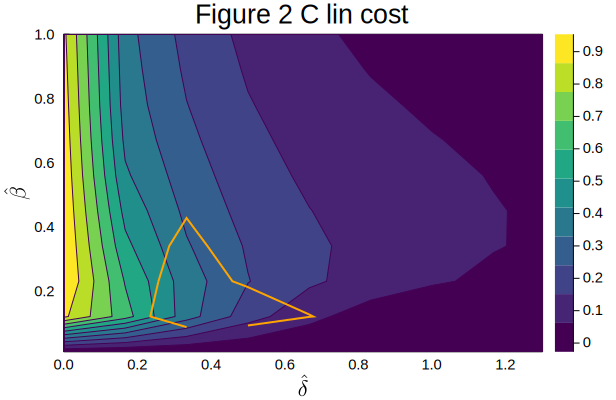

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498


In [6]:
## Linear cost
Ω0=0.1 

levs = 10
perscent_of_dis=0.7



δ3= load(files[1],"delta")
β3 = load(files[1],"beta")
meanencounters23,reps3,asteps3,bsteps3,dsteps3,amax3= load(files[1],"parameters")

κ=Ω0/10

utilityopt13 = load(files[1],"max_utility")./amax3.*sqrt(π)
alphaopt23= load(files[1],"otimal_alpha")
dissmax23= load(files[1],"dissmax")
uses3= load(files[1],"meory_used_at_the_min")
freeload3=utilityopt13.+dissmax23
utilityopt23= zeros(bsteps3,dsteps3)
       for ii in 1:dsteps3
            for jj in 1:bsteps3
                utilityopt23[jj,ii] = (utilityopt13[jj,ii] -meanencounters23 *κ*β3[jj])
            end
    
        end
ylim=(β3[1]/10,1) 

δ1=δ3.*1
δ3=δ1.*amax3

β3=β3./10

doubleopt,aopt,bopt,dissopt,usesopt=give_double_max_from_max_a_all(utilityopt23,alphaopt23,β3,dissmax23./meanencounters23,uses3)

plot_meanu=contour((δ3),(β3),(utilityopt23./meanencounters23 ),fill=true,ylimits=ylim,xlabel= " \\hat \\delta",ylabel= "\\hat  \\beta ",title="Net Utility ",levels=levs,linewidth=2*upscale,c=:viridis);
contour!((δ3),(β3),(dissmax23./meanencounters23),fill=false,xlabel= "\\hat \\delta",ylabel= "\\hat  \\beta ",levels=[perscent_of_dis*maximum(dissmax23)./meanencounters23],linewidth=4*upscale,c=:orange);


plot_meanu_diss_lin=contour!((δ3),(β3),(utilityopt23./meanencounters23 ),fill=false,ylimits=ylim,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\beta \$",title="Figure 2 C lin cost",levels=levs,linewidth=0.001,xlimits=(0,1.3),framestyle=:box,linestyle=:solid, linealpha=1,guidefontsize=15,guide_position=((1,2),(1,10)));

plot_meanu_diss_lin

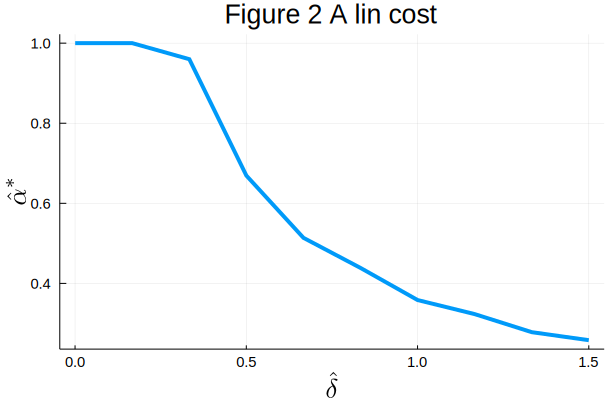

In [7]:
plot((δ3),aopt./amax3,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\alpha^* \$",title="Figure 2 A lin cost",label="",linewidth=4)

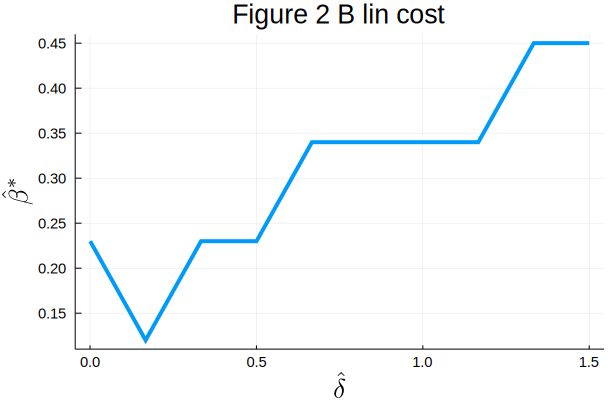

In [8]:
plot((δ3),bopt,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\beta^* \$",title="Figure 2 B lin cost",label="",linewidth=4)

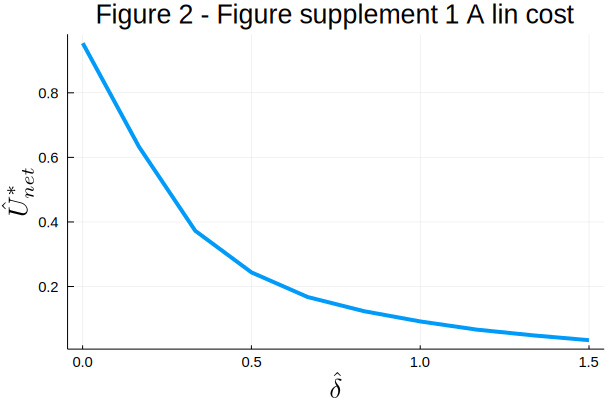

In [9]:
plot((δ3),doubleopt./meanencounters,xlabel= "\$\\hat \\delta \$",ylabel= "\$ \\hat  U_{net}^* \$",title="Figure 2 - Figure supplement 1 A lin cost",label="",linewidth=4)

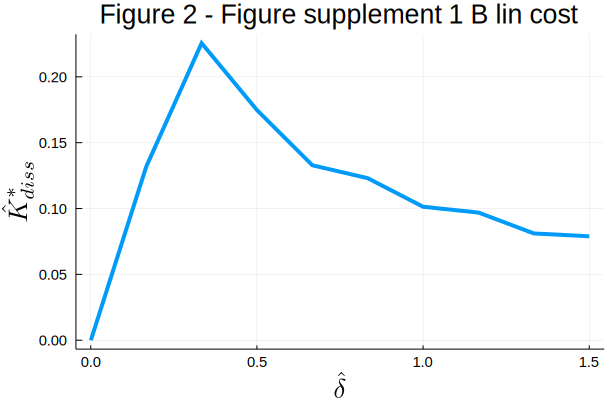

In [10]:
plot((δ3),dissopt,xlabel= "\$\\hat \\delta \$",ylabel= "\$ \\hat  K_{diss}^* \$",title="Figure 2 - Figure supplement 1 B lin cost",label="",linewidth=4)

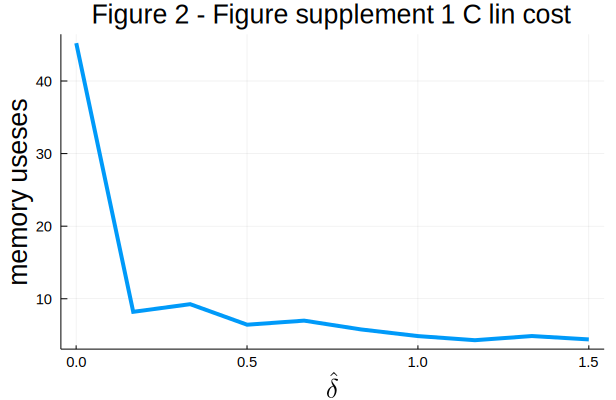

In [11]:
plot((δ3),usesopt,xlabel= "\$\\hat \\delta \$",ylabel= "memory useses",title="Figure 2 - Figure supplement 1 C lin cost ",label="",linewidth=4)

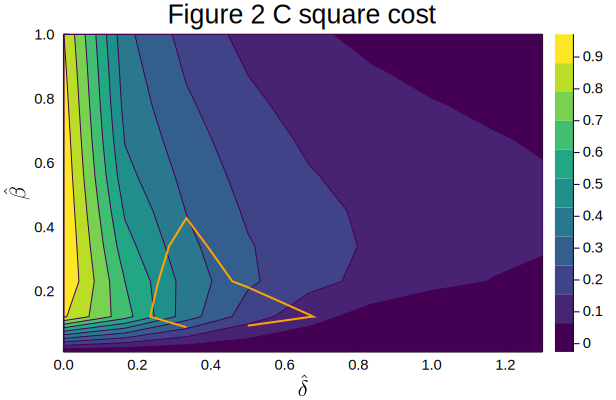

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different line width share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different line alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/oskar/.julia/packages/Plots/vsE7b/src/backends/gr.jl:498


In [12]:
## squerd cost
Ω0=0.1 

levs = 10
perscent_of_dis=0.7



δ3= load(files[1],"delta")
β3 = load(files[1],"beta")
meanencounters23,reps3,asteps3,bsteps3,dsteps3,amax3= load(files[1],"parameters")

κ=Ω0/100

utilityopt13 = load(files[1],"max_utility")./amax3.*sqrt(π)
alphaopt23= load(files[1],"otimal_alpha")
dissmax23= load(files[1],"dissmax")
uses3= load(files[1],"meory_used_at_the_min")
freeload3=utilityopt13.+dissmax23
utilityopt23= zeros(bsteps3,dsteps3)
       for ii in 1:dsteps3
            for jj in 1:bsteps3
                utilityopt23[jj,ii] = (utilityopt13[jj,ii] -meanencounters23 *κ*β3[jj]*β3[jj])
            end
    
        end
ylim=(β3[1]/10,1) 

δ1=δ3.*1
δ3=δ1.*amax3

β3=β3./10

doubleopt,aopt,bopt,dissopt,usesopt=give_double_max_from_max_a_all(utilityopt23,alphaopt23,β3,dissmax23./meanencounters23,uses3)

plot_meanu=contour((δ3),(β3),(utilityopt23./meanencounters23 ),fill=true,ylimits=ylim,xlabel= " \\hat \\delta",ylabel= "\\hat  \\beta ",title="Net Utility ",levels=levs,linewidth=2*upscale,c=:viridis);
contour!((δ3),(β3),(dissmax23./meanencounters23),fill=false,xlabel= "\\hat \\delta",ylabel= "\\hat  \\beta ",levels=[perscent_of_dis*maximum(dissmax23)./meanencounters23],linewidth=4*upscale,c=:orange);


plot_meanu_diss_sq=contour!((δ3),(β3),(utilityopt23./meanencounters23 ),fill=false,ylimits=ylim,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\beta \$",title="Figure 2 C square cost",levels=levs,linewidth=0.001,xlimits=(0,1.3),framestyle=:box,linestyle=:solid, linealpha=1,guidefontsize=15,guide_position=((1,2),(1,10)));

plot_meanu_diss_sq


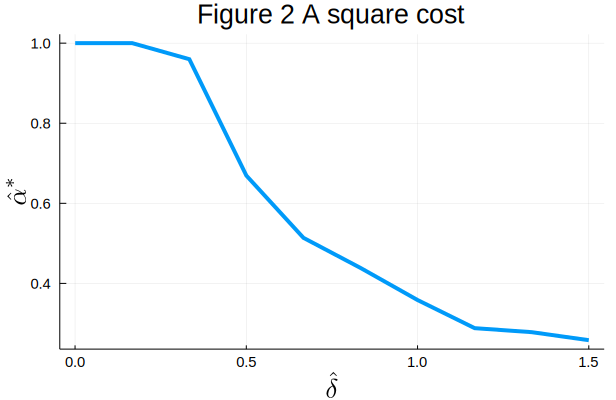

In [13]:
plot((δ3),aopt./amax3,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\alpha^* \$",title="Figure 2 A square cost",label="",linewidth=4)

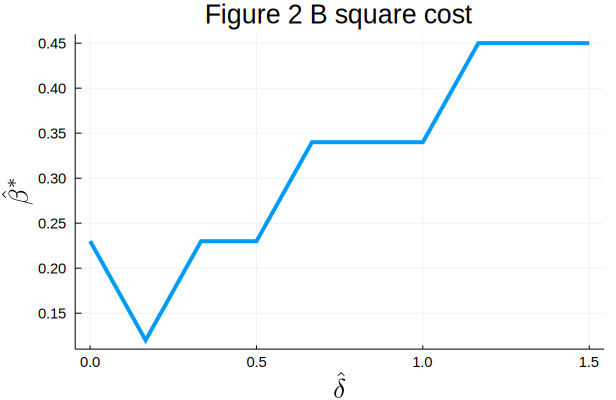

In [14]:
plot((δ3),bopt,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\beta^* \$",title="Figure 2 B square cost",label="",linewidth=4)

Production of the data for Figure 2 -Figure Supplement 2 

In [23]:
include("../Src/simulations-bcel-DM-diss-genneral-gauss2.jl")

get_files (generic function with 1 method)

In [24]:

θ=1
meanencounters=60
reps=100
asteps=50
bsteps=10
dsteps=10
amax=4  


for thisb in 1:bsteps
    simulation_DM_cluster_drift_real_oneB_phi(meanencounters,reps,asteps,bsteps,dsteps,amax,thisb,θ);
end

addup_simulation_DM_cluster_drift_real_oneB_phi(meanencounters,reps,asteps,bsteps,dsteps,amax,θ);

I want to do  Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_1.jld2
Data Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_1.jld2 allready exists
I want to do  Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_2.jld2
Data Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_2.jld2 allready exists
I want to do  Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_3.jld2
Data Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_3.jld2 allready exists
I want to do  Data/Gen_Bell/Singel_beta/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real-thisb_4.jld2
Data Data/Gen_Bell/Singel_beta/meanencounters_60

In [25]:
direct="Data/Gen_Bell/full/"
filrname="meanencounters_$(meanencounters)/reps_$(reps)/Phi_$(θ)/DATA_Asteps_$(asteps)-Bsteps_$(bsteps)-Dsteps_$(dsteps)-amax_$(amax)_real.jld2"
files_theta = get_files(direct,filrname)
β_theta = load(files_theta[1],"beta")
δ_theta = load(files_theta[1],"delta")  
files_theta

1-element Array{String,1}:
 "Data/Gen_Bell/full/meanencounters_60/reps_100/Phi_1/DATA_Asteps_50-Bsteps_10-Dsteps_10-amax_4_real.jld2"

In [26]:

Ω0=0.1 





δ_theta= load(files_theta[1],"delta")

β_theta = load(files_theta[1],"beta")
meanencounters_theta,reps_theta,asteps_theta,bsteps_theta,dsteps_theta,amax_theta,θ_theta= load(files_theta[1],"parameters")

utility_load_theta = load(files_theta[1],"max_utility").*norm_gen_gaus(θ_theta, amax_theta)
alphaopt_theta= load(files_theta[1],"otimal_alpha")
dissmax_theta= load(files_theta[1],"dissmax")
uses_theta= load(files_theta[1],"meory_used_at_the_min")

utilityopt_theta= zeros(bsteps_theta,dsteps_theta)
κ=Ω0/10

       for ii in 1:dsteps_theta
            for jj in 1:bsteps_theta
               utilityopt_theta[jj,ii] = (utility_load_theta[jj,ii] -meanencounters_theta *κ*β_theta[jj])
            end
    
        end


δ3_theta=δ_theta.* (amax_theta)

β_theta=β_theta./10
    
    
doubleopt_theta,aopt_theta,bopt_theta,dissopt_theta,usesopt_theta=give_double_max_from_max_a_all(utilityopt_theta,alphaopt_theta,β_theta,dissmax_theta./meanencounters_theta,uses_theta);




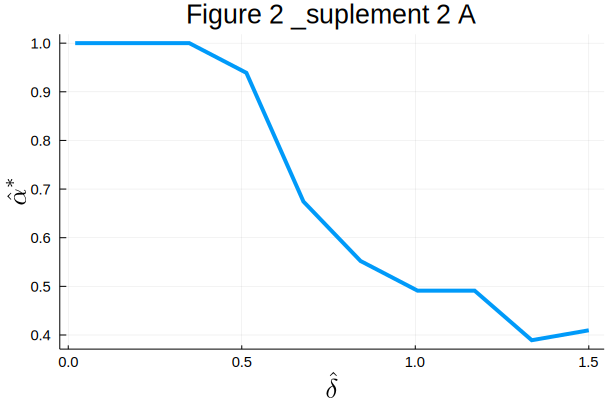

In [27]:
plot((δ3_theta),aopt_theta./amax_theta,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\alpha^* \$",title="Figure 2 _suplement 2 A",label="",linewidth=4)

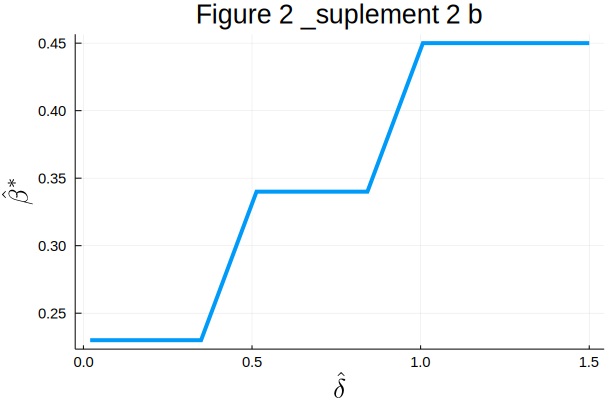

In [28]:
plot((δ3_theta),bopt_theta,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  \\beta^* \$",title="Figure 2 _suplement 2 b",label="",linewidth=4)

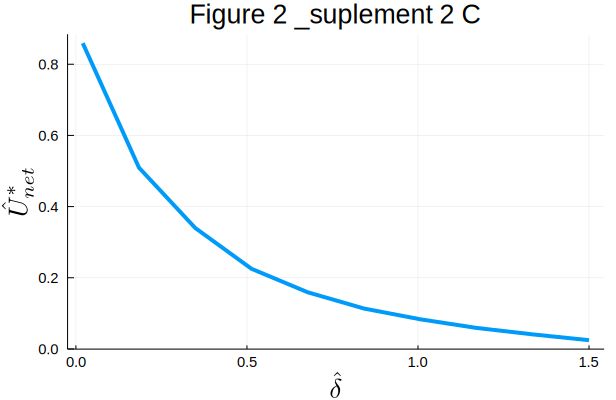

In [29]:
plot((δ3_theta),doubleopt_theta./meanencounters_theta,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  U_{net}^* \$",title="Figure 2 _suplement 2 C",label="",linewidth=4)

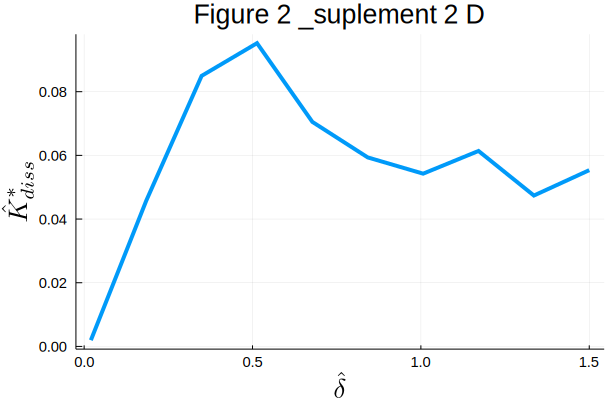

In [30]:
plot((δ3_theta),dissopt_theta,xlabel= "\$\\hat \\delta \$",ylabel= "\$\\hat  K_{diss}^* \$",title="Figure 2 _suplement 2 D",label="",linewidth=4)